# **Assignment 2**
# Khaled Saleh : 2232890 - Mohanad Assaf : 2233114

# **Import Packages**

In [1]:
from PIL import Image, ImageFilter, ImageChops
from IPython.display import display
import numpy as np

## **Implementing the Code**

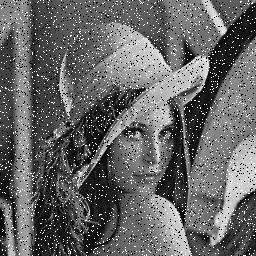

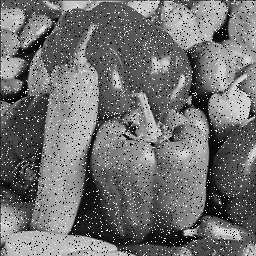

In [2]:
LenaGrayNoisy = Image.open('LenaGrayNoisy.jpg')
PeppersGrayNoisy = Image.open('PeppersGreyNoisy.jpg')
display(LenaGrayNoisy) ; display(PeppersGrayNoisy)

#### **Write a program to implement (i) Image Negative and (ii) a gray scale Median Filter. In the cases of median filter, use a 3 × 3 square structuring element (window). To handle edge effects, set output pixels equal to gray level zero when the structuring element hangs over the borders of the image.(Note: we usually handle edge effects by replication for these filters. But setting the output pixels to zero instead simplifies the programming required for doing this assignment).**

#### **Image Negative**

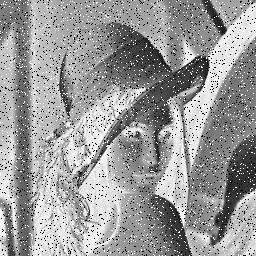

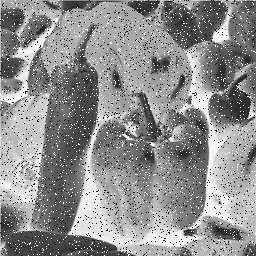

In [3]:
def image_negative(image):
    width, height = image.size
    negative_image = Image.new("L", (width, height))  # Use "L" for grayscale image
    for x in range(width):
        for y in range(height):
            pixel_value = image.getpixel((x, y))
            negative_pixel_value = 255 - pixel_value
            negative_image.putpixel((x, y), negative_pixel_value)
    return negative_image

Negative_Lena = image_negative(LenaGrayNoisy)
Negative_Pepper = image_negative(PeppersGrayNoisy)
display(Negative_Lena) ; display(Negative_Pepper)
Negative_Lena.save('Negative_Lena.jpg')
Negative_Pepper.save('Negative_Pepper.jpg')

#### **Median Filter**

#### **x < radius: pixels on the left edge of the image.**
    
#### **x >= width - radius: pixels on the right edge of the image.**
    
#### **y < radius: pixels on the top edge of the image.**
    
#### **y >= height - radius: pixels on the bottom edge of the image.**

#### **x < radius and y < radius: pixels in the top-left corner of the image.**

#### **x < radius and y >= height - radius : pixels in the bottom-left corner of the image.**

#### **x >= width - radius and y < radius : pixels in the top-right corner of the image.**

#### **x >= width - radius and y >= height - radius : pixels in the bottom-right corner of the image**

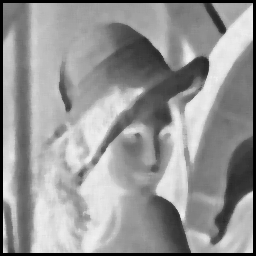

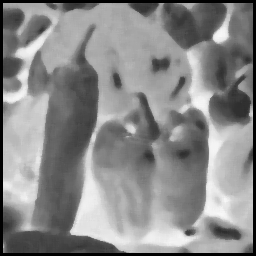

In [4]:
def median_filter(image, radius): # filter_size == radious
    # radious = 1 --> 3x3 --> to detemine the size of the neighborhood around each pixel.
    image_array = np.array(image)
    width, height = image.size
    filtered_image = Image.new("L", (width, height)) # L for gray levels
    for x in range(width):
        for y in range(height):
            # Edge handling the N8
            if (x < radius) or (x >= width - radius) or (y < radius) or (y >= height - radius) or \
               (x < radius and y < radius) or (x < radius and y >= height - radius) or \
               (x >= width - radius and y < radius) or (x >= width - radius and y >= height - radius):
                filtered_image.putpixel((x, y), 0)
            # We are in the valid region
            else:
                region = image_array[y - radius:y + radius + 1, x - radius:x + radius + 1]
                diagonal_region = np.diag(region)
                median_value = np.median(region.flatten())
                filtered_image.putpixel((x, y), int(median_value))
    return filtered_image

Negative_Lena_filtered = median_filter(Negative_Lena, 3)
Negative_Pepper_filtered = median_filter(Negative_Pepper, 3)
display(Negative_Lena_filtered) ; display(Negative_Pepper_filtered)
Negative_Lena_filtered.save('Negative_Lena_filtered.jpg')
Negative_Pepper_filtered.save('Negative_Pepper_filtered.jpg')

## Additional experiments 😇

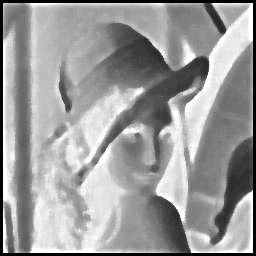

In [5]:
def sharpen_image(image):
    # Apply a Gaussian blur to the image
    blurred_image = image.filter(ImageFilter.GaussianBlur(radius=3))
    # Subtract the blurred image from the original to get the sharpened image
    sharpened_image = ImageChops.subtract(image, blurred_image)
    # Add the sharpened image to the original image to make the edges and details sharped
    final_image = ImageChops.add(image, sharpened_image)
    return final_image

Negative_Lena_filtered = Image.open('Negative_Lena_filtered.jpg')
sharpened_image = sharpen_image(Negative_Lena_filtered)
sharpened_image.save('sharpened_image.jpg')
display(sharpened_image)

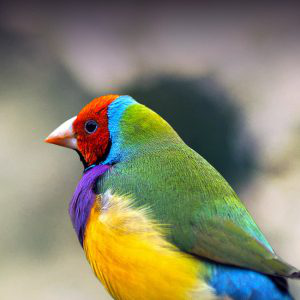

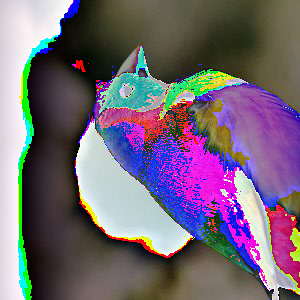

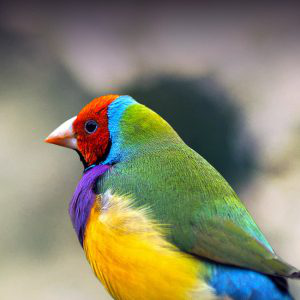

In [6]:
def encrypt_image(image):
    image_array = np.array(image)
    encrypted_image_array = (image_array + 159) % 256 # because it is 8 bit image
    return Image.fromarray(np.transpose(encrypted_image_array, (1,0,2)).astype(np.uint8))
def decrypt_image(encrypted_image):
    encrypted_image_array = np.array(encrypted_image)
    decrypted_image_array = (np.transpose(encrypted_image_array,(1,0,2)) - 159) % 256
    return Image.fromarray(decrypted_image_array.astype(np.uint8))

image = Image.open("Picture_to_Encrypt.jpg")
# display the original image.
display(image)
# encrypt the image.
encrypt = encrypt_image(image)
encrypt.save("Encrypted_Image.png")
# display the encrypted image.
display(encrypt)
# decrypt the encrypted image.
encrypted = Image.open('Encrypted_Image.png')
decrypt = decrypt_image(encrypted)
decrypt.save("Decrypted_Image.png")
# display the decrypted image.
display(decrypt)